In [8]:
import pickle
import torch

# with open(f'./data/openai_gpt_final_results.pkl', 'rb') as infile:
#     results = pickle.load(infile)

with open(f'./data/openai_deberta_final_results.pkl', 'rb') as infile:
    results = pickle.load(infile)

print(results.keys())

dict_keys(['ids', 'entropy', 'dentropy', 'og_entropy', 'entropy_correct', 'dentropy_correct', 'og_entropy_correct', 'sets', 'dsets', 'og_sets', 'perplexity', 'perplexity_correct'])


In [25]:
import os
import pandas as pd

questions = pd.read_csv('~/RCOG_Uncertainty_Dataset_Unanswered.csv')

questions.Source.unique()

array(['SBAs for the Part 1 MRCOG', 'RCOG',
       'Part 1 MRCOG Revision Notes and Sample SBAs',
       'SBAs for the Part 2 MRCOG',
       'Cambridge SBA Questions for the Part 2 MRCOG',
       'Part 2 MRCOG: 500 EMQs and SBAs', 'EMQs for the MRCOG Part 2'],
      dtype=object)

In [26]:
questions.head()

,Source,Paper,Part,Subject,Question Number,Question Type,Question,Table,Image,Option A,...,Option K,Option L,Option M,Option N,Option O,Option P,Option Q,Option R,Table Options,Actual Answer
0,SBAs for the Part 1 MRCOG,Mock paper: paper 1,One,Embryology,1.0,SBAs,From which germ cell layer are the ureters der...,NaN,NaN,Ectoderm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,SBAs for the Part 1 MRCOG,Mock paper: paper 1,One,Embryology,2.0,SBAs,The urachus becomes fibrosed and obliterated t...,NaN,NaN,Falciform ligament,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E
2,SBAs for the Part 1 MRCOG,Mock paper: paper 1,One,Anatomy,3.0,SBAs,A pudendal nerve block is used in obstetrics t...,NaN,NaN,L4–5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
3,SBAs for the Part 1 MRCOG,Mock paper: paper 1,One,Anatomy,4.0,SBAs,Which structure is attached to the lateral asp...,NaN,NaN,Broad ligament,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
4,SBAs for the Part 1 MRCOG,Mock paper: paper 1,One,Anatomy,5.0,SBAs,The majority of the lymphatic drainage of the ...,NaN,NaN,Axillary nodes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from roc_utils import *

negent = -1*np.array(results["entropy"])
ent_correct = np.array(results["entropy_correct"]).astype(np.float32)

negdent = -1*np.array(results["dentropy"])
dent_correct = np.array(results["dentropy_correct"]).astype(np.float32)

neg_og_ent = -1*np.array(results["og_entropy"])
og_ent_correct = np.array(results["og_entropy_correct"]).astype(np.float32)

negperp = -1*np.array(results["perplexity"])
perp_correct = np.array(results["perplexity_correct"]).astype(np.float32)

print("negent")
print(negent)
print(ent_correct.sum() / ent_correct.shape[0])

print("negdent")
print(negdent)
print(dent_correct.sum() / dent_correct.shape[0])

print("neg_og_ent")
print(neg_og_ent)
print(og_ent_correct.sum() / og_ent_correct.shape[0])

print("neg_perp")
print(negperp)
print(perp_correct.sum() / perp_correct.shape[0])

negent
[ 0.00000000e+00  0.00000000e+00 -1.11022302e-16 ... -2.22044605e-16
  0.00000000e+00  0.00000000e+00]
0.6485745614035088
negdent
[ 0.00000000e+00  0.00000000e+00 -1.11022302e-16 ... -2.22044605e-16
  0.00000000e+00  0.00000000e+00]
0.6447368421052632
neg_og_ent
[1.2856712 1.2930951 1.2507522 ... 0.9969609 1.135097  1.1573899]
0.6540570175438597
neg_perp
[-1.00420279 -1.00536251 -1.00864692 ... -1.1778984  -1.15049644
 -1.05642206]
0.6452850877192983


In [10]:
roc1 = compute_roc(X=negent, y=ent_correct, pos_label=1.0)
roc2 = compute_roc(X=negperp, y=perp_correct, pos_label=1.0)
roc3 = compute_roc(X=negdent, y=dent_correct, pos_label=1.0)
roc4 = compute_roc(X=neg_og_ent, y=og_ent_correct, pos_label=1.0)
print(roc1)
print(roc2)
print(roc3)
print(roc4)

{'fpr': array([0.        , 0.        , 0.63693271, 0.63849765, 0.63849765,
       0.6400626 , 0.64162754, 0.64162754, 0.64162754, 0.64319249,
       0.64319249, 0.64475743, 0.64632238, 0.64788732, 0.64788732,
       0.64945227, 0.64945227, 0.64945227, 0.65101721, 0.65101721,
       0.65101721, 0.65101721, 0.65101721, 0.65101721, 0.65258216,
       0.65258216, 0.6541471 , 0.6541471 , 0.6541471 , 0.65571205,
       0.657277  , 0.657277  , 0.657277  , 0.65884194, 0.65884194,
       0.66040689, 0.66197183, 0.66353678, 0.66510172, 0.66666667,
       0.66823161, 0.66979656, 0.66979656, 0.6713615 , 0.67292645,
       0.67292645, 0.67449139, 0.67449139, 0.67449139, 0.67605634,
       0.67762128, 0.67918623, 0.67918623, 0.68075117, 0.68075117,
       0.68231612, 0.68388106, 0.68544601, 0.68701095, 0.6885759 ,
       0.69014085, 0.69014085, 0.69170579, 0.69327074, 0.69327074,
       0.69327074, 0.69483568, 0.69640063, 0.69796557, 0.69796557,
       0.69796557, 0.69953052, 0.70109546, 0.70266041,

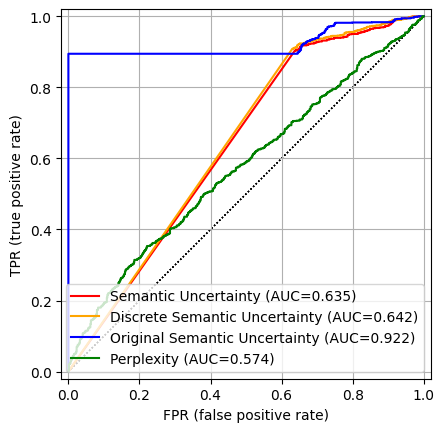

In [11]:
_, ax3 = plt.subplots()
plot_roc(roc1, label="Semantic Uncertainty", color="red", ax=ax3)
plot_roc(roc3, label="Discrete Semantic Uncertainty", color="orange", ax=ax3)
plot_roc(roc4, label="Original Semantic Uncertainty", color="blue", ax=ax3)
plot_roc(roc2, label="Perplexity", color="green", ax=ax3)

In [10]:
with open(f'./data/openai_generations.pkl', 'rb') as infile:
    sequences = pickle.load(infile)

(array([ 2.,  2.,  5.,  4.,  7.,  9.,  7.,  7., 12., 15., 32., 14., 15.,
        26., 18., 33., 31., 18., 17., 22., 29., 26., 16., 17., 33., 17.,
        26., 22., 28., 14., 24., 23., 19., 17., 21., 23., 24., 28., 23.,
        33., 21., 36., 35., 46., 29., 29., 46., 36., 37., 44., 55., 47.,
        57., 54., 47., 64., 47., 55., 40., 34., 33., 30., 21., 21., 23.,
        20., 13.,  8.,  9.,  8.,  7.,  3.,  4.,  1.,  1.,  1.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  3.   ,   4.094,   5.188,   6.282,   7.376,   8.47 ,   9.564,
         10.658,  11.752,  12.846,  13.94 ,  15.034,  16.128,  17.222,
         18.316,  19.41 ,  20.504,  21.598,  22.692,  23.786,  24.88 ,
         25.974,  27.068,  28.162,  29.256,  30.35 ,  31.444,  32.538,
         33.632,  34.726,  35.82 ,  36.914,  38.008,  39.102,  40.196,
         41.29 ,  42.384,  43.478,  44.572,  45.666,  46.76 ,  47.854,
        

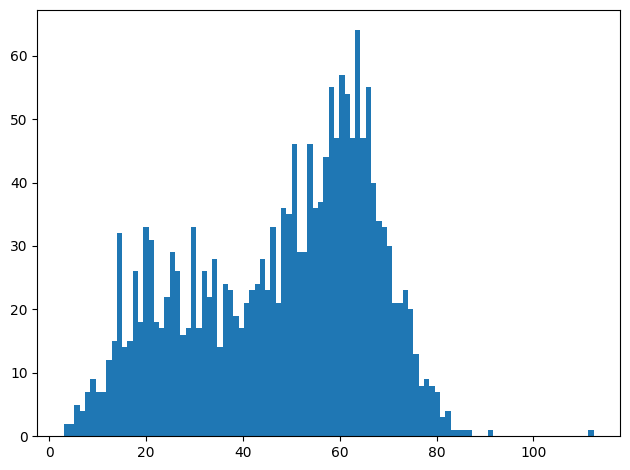

In [31]:
import matplotlib.pyplot as plt
seq_lengths = []
for seq in sequences:
    lengths = [len(x) for x in seq["generated_answers"]]
    seq_lengths.append(np.mean(lengths))

seq_lengths
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(seq_lengths, bins=100)